In [114]:
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, auc
from pyod.utils.utility import precision_n_scores 
from sklearn.preprocessing import RobustScaler
import numpy as np

from src.comadout import ComadOut
from src.cmoplus import CMOPlus
from src.utils.load_utils import load_local_mat, set_seeds

In [115]:
# fix tf version
#%pip install protobuf==3.20.1  
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"

X.shape (129, 13) y.shape (129,)


/gxfs_home/cau/sunip636/.conda/envs/cmoeval2/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


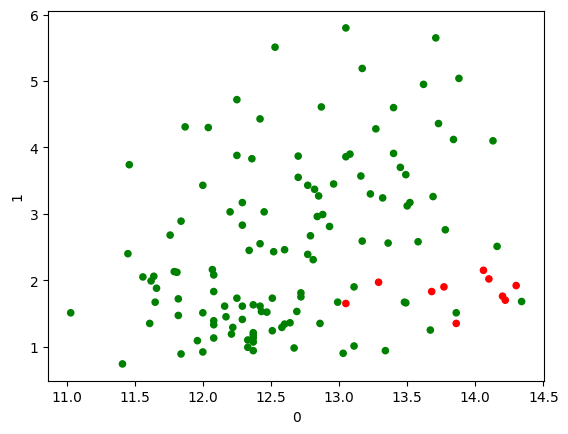

In [116]:
folderpath = "./comadout_datasets"
datasetname = "wine"
verbose=True

data = load_local_mat(folderpath, datasetname, add_rand_cols=0, verbose=verbose)
Xdata = RobustScaler(with_centering=True, with_scaling=True, unit_variance=True).fit_transform(data.values)
Xdata = data.values.astype(dtype=np.float64)

y = data.labels.astype(dtype=np.float64)

In [117]:
seed = 0
ratio = 0.25
set_seeds(seed)

In [118]:
# CMO* variants
cmp = CMOPlus(n_components=ratio, title="CMO*", center_by='median', random_state=seed, verbose=0, fast=True, opt_evals=True, scaler='Robust')    
_, _ = cmp.fit(Xdata)

In [119]:
def print_results(cmp, y, metric, metricf, decs):

    if metricf == precision_recall_curve:
        prec1, rc1, _ = metricf(y, cmp.accum_pc_outlier_scores_rawsc)
        prec2, rc2, _ = metricf(y, cmp.accum_pc_outlier_scores_kurts)
        prec3, rc3, _ = metricf(y, cmp.accum_pc_outlier_scores_evrsc)
        prec4, rc4, _ = metricf(y, cmp.accum_pc_outlier_scores_kurts_evr)
        prec5, rc5, _ = metricf(y, cmp.accum_pc_outlier_scores_enmed)
        metricf = auc
        print(f"{metric} - CMO+: {round(metricf(rc1, prec1), decs['m'])}")
        print(f"{metric} - CMO+k: {round(metricf(rc2, prec2), decs['m'])}")
        print(f"{metric} - CMO+e: {round(metricf(rc3, prec3), decs['m'])}")
        print(f"{metric} - CMO+ke: {round(metricf(rc4, prec4), decs['m'])}")
        print(f"{metric} - CMOEns: {round(metricf(rc5, prec5), decs['m'])}")
    else:    
        print(f"{metric} - CMO+: {round(metricf(y, cmp.accum_pc_outlier_scores_rawsc), decs['m'])}")
        print(f"{metric} - CMO+k: {round(metricf(y, cmp.accum_pc_outlier_scores_kurts), decs['m'])}")
        print(f"{metric} - CMO+e: {round(metricf(y, cmp.accum_pc_outlier_scores_evrsc), decs['m'])}")
        print(f"{metric} - CMO+ke: {round(metricf(y, cmp.accum_pc_outlier_scores_kurts_evr), decs['m'])}")
        print(f"{metric} - CMOEns: {round(metricf(y, cmp.accum_pc_outlier_scores_enmed), decs['m'])}")

decs={'m':4}
print_results(cmp, y, "AUROC", roc_auc_score, decs)
print_results(cmp, y, "AP", average_precision_score, decs)
print_results(cmp, y, "P@N", precision_n_scores, decs)
print_results(cmp, y, "AUPRC", precision_recall_curve, decs)

AUROC - CMO+: 0.8597
AUROC - CMO+k: 0.9202
AUROC - CMO+e: 0.8807
AUROC - CMO+ke: 0.9034
AUROC - CMOEns: 0.7366
AP - CMO+: 0.2672
AP - CMO+k: 0.3946
AP - CMO+e: 0.3033
AP - CMO+ke: 0.3617
AP - CMOEns: 0.1674
P@N - CMO+: 0.3
P@N - CMO+k: 0.5
P@N - CMO+e: 0.3
P@N - CMO+ke: 0.4
P@N - CMOEns: 0.0
AUPRC - CMO+: 0.234
AUPRC - CMO+k: 0.3557
AUPRC - CMO+e: 0.2668
AUPRC - CMO+ke: 0.3235
AUPRC - CMOEns: 0.4646


/gxfs_home/cau/sunip636/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
# CMO baseline
clf = ComadOut(n_components=ratio, title='CMO', softmax_scoring=False, center_by='median', random_state=seed, verbose=0, fast=True, opt_evals=True, scaler=None)
clf.fit(Xdata)
decision_scores_ = clf.decision_function(Xdata)

In [121]:

def print_results2(decision_scores_, y, metric, metricf, decs):

    if metricf == precision_recall_curve:
        prec1, rc1, _ = metricf(y, decision_scores_)
        metricf = auc
        print(f"{metric} - CMO: {round(metricf(rc1, prec1), decs['m'])}")
    else:    
        print(f"{metric} - CMO: {round(metricf(y, decision_scores_), decs['m'])}")

print_results2(decision_scores_, y, "AUROC", roc_auc_score, decs)
print_results2(decision_scores_, y, "AP", average_precision_score, decs)
print_results2(decision_scores_, y, "P@N", precision_n_scores, decs)
print_results2(decision_scores_, y, "AUPRC", precision_recall_curve, decs)

AUROC - CMO: 0.4748
AP - CMO: 0.0775
P@N - CMO: 0.0
AUPRC - CMO: 0.0388
